## Bayesian linear regression (known error precision)

###### Assumptions: polynomial basis functions, scalar output, scalar input, model error precision known
###### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com

In [1]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
random.seed(106) # fixing the random seed

#### Problem definition

In [2]:
polyPower = [0,1,2,3,4,5] # powers of polynomial basis
N = len(polyPower) # number of basis
def basisFun(Xth,ith): # basis functions
    return Xth**polyPower[ith]
m0 = np.ones(N)*0 # prior mean of w
P0 = np.diag([1e+03]*N) # prior covariance of w
RHO = 100 # known error precision
trueKnown =1 # 0 = dont plot true, 1= plot true 
Wtrue=[0]*N  # true parameter value used for plotting
Wtrue[0]=1
Wtrue[2]=1 

#### Load observations and generate design matrix

In [3]:
Yobs = np.loadtxt('Ydata.dat') 
Xobs = np.loadtxt('Xdata.dat')
M = len(Yobs)
Phi = np.zeros((M,N))
for i in range(0,M):
    for j in range(0,N):
        Phi[i,j] = basisFun(Xobs[i],j)

#### Bayesian linear regression

In [4]:
GAMinv = np.identity(M)*RHO 
P0inv = la.inv(P0) 
PMLEinv = np.matmul(np.matmul(np.transpose(Phi),GAMinv),Phi)
Wmle = np.matmul(np.matmul(np.matmul(la.inv(PMLEinv),np.transpose(Phi)),GAMinv),Yobs)
Pinv = P0inv + PMLEinv
P = la.inv(Pinv) 
m = np.matmul(P,np.matmul(P0inv,m0) + np.matmul(PMLEinv,Wmle))
B = np.matmul(Phi,np.matmul(P0,np.transpose(Phi))) + la.inv(GAMinv)
gof = np.log(st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m),la.inv(GAMinv))) - 0.5*np.trace(np.matmul(PMLEinv,P))
eig = np.log(st.multivariate_normal.pdf(m,m,P)) - np.log(st.multivariate_normal.pdf(m,m0,P0)) - 0.5*N+0.5*np.trace(np.matmul(P0inv,P))
logEvid = np.log(st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m0),B))
u1,s1,v1 = la.svd(PMLEinv)
u2,s2,v2 = la.svd(Pinv)
resNormMLE = la.norm(Yobs-np.matmul(Phi,Wmle))
resNormMAP = la.norm(Yobs-np.matmul(Phi,m))
#print(gof,eig,logEvid,gof-eig)

In [5]:
print('         Estimates for W           Precision estimate for W     Eigenvalues of precision matrix')
print(' i   prior      mle       map       prior     mle       map         mle        map')
for i in range(0,N):
    print("{0:2d}{1:10.2e}{2:10.2e}{3:10.2e}{4:10.2e}{5:10.2e}{6:10.2e}{7:12.2e}{8:12.2e}".format(\
        int(i),m0[i],Wmle[i],m[i],P0inv[i,i],PMLEinv[i,i],Pinv[i,i],s1[i],s2[i]))
print("\n                        Cond no.    Rank")
print("mle precision matrix: {0:10.2e}{1:5d}/{2:2d}".format(la.cond(PMLEinv), la.matrix_rank(PMLEinv),N))
print("map precision matrix: {0:10.2e}{1:5d}/{2:2d}".format(la.cond(Pinv), la.matrix_rank(Pinv),N))
print("Matrix B:             {0:10.2e}{1:5d}/{2:2d}".format(la.cond(B), la.matrix_rank(B),M))
print("\n|1-Pinv*P|:       {0:9.2e}".format(abs(1-la.det(np.matmul(Pinv,P)))))
print("|1-PMLEinv*PMLE|: {0:9.2e}".format(abs(1-la.det(np.matmul(PMLEinv,la.inv(PMLEinv))))))
print("\nGof:   {0:12.3e}\nEIG: {1:14.3e}\nLogEvid: {2:10.3e}".format(gof,eig,logEvid))
print("\nRho: {0:16.2e}\nResNormMLE: {1:9.2e}\nResNormMAP: {2:9.2e}".format(RHO,resNormMLE,resNormMAP))
CorMat = np.zeros((N,N))
print("\nCorrelation matrix: ")
for ii in range(0,N):
    for jj in range(0,N):
        CorMat[ii,jj] = P[ii,jj]/np.sqrt(P[ii,ii]*P[jj,jj])
        print("{:6.2f}".format(CorMat[ii,jj]),end="")
    print('')    

         Estimates for W           Precision estimate for W     Eigenvalues of precision matrix
 i   prior      mle       map       prior     mle       map         mle        map
 0  0.00e+00  1.04e+00  9.61e-01  1.00e-03  2.50e+03  2.50e+03    4.15e+03    4.15e+03
 1  0.00e+00 -3.35e+00 -2.54e-01  1.00e-03  8.51e+02  8.51e+02    6.64e+02    6.64e+02
 2  0.00e+00  2.98e+01  7.24e+00  1.00e-03  5.31e+02  5.31e+02    4.70e+01    4.70e+01
 3  0.00e+00 -8.17e+01 -2.16e+01  1.00e-03  3.95e+02  3.95e+02    1.88e+00    1.88e+00
 4  0.00e+00  9.33e+01  2.63e+01  1.00e-03  3.19e+02  3.19e+02    4.10e-02    4.20e-02
 5  0.00e+00 -3.70e+01 -1.06e+01  1.00e-03  2.72e+02  2.72e+02    3.76e-04    1.38e-03

                        Cond no.    Rank
mle precision matrix:   1.10e+07    6/ 6
map precision matrix:   3.02e+06    6/ 6
Matrix B:               4.15e+06   25/25

|1-Pinv*P|:        9.09e-12
|1-PMLEinv*PMLE|:  6.55e-11

Gof:      2.145e+01
EIG:      2.354e+01
LogEvid: -2.084e+00

Rho:         1.

#### Plot parameter marginal pdfs

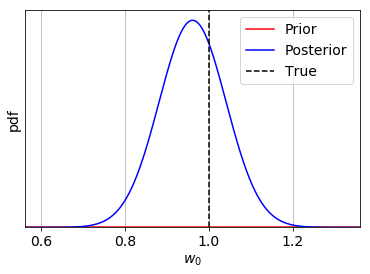

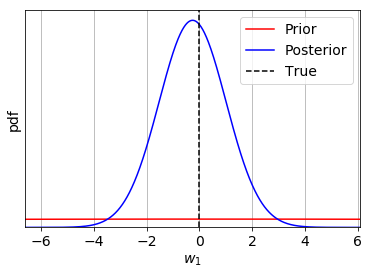

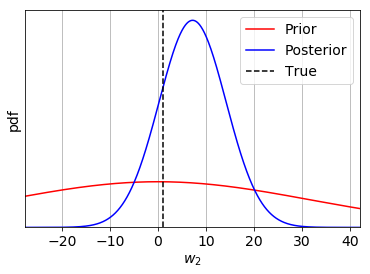

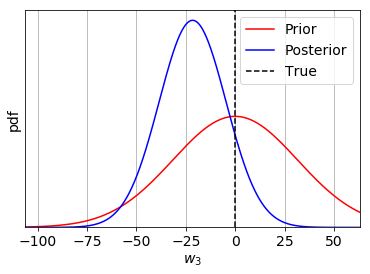

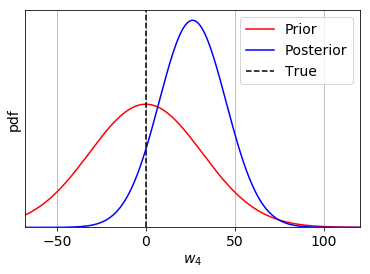

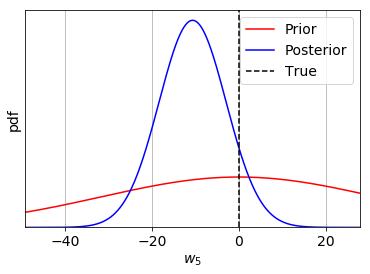

In [6]:
mpl.rcParams.update({'font.size':14})
Wlim = [-6,6]  # xlim for plotting pdf plots
Ngrid = 1000  # density for grid generation in X
pscale=5  # for automatic bound calculation for pdf plots 
for i in range(0,N):
    Wpriormin = m0[i]-pscale*np.sqrt(P0[i,i])
    Wpriormax = m0[i]+pscale*np.sqrt(P0[i,i])
    Wpostmin = m[i]-pscale*np.sqrt(P[i,i])
    Wpostmax = m[i]+pscale*np.sqrt(P[i,i])
    Wlim = [min(Wpriormin,Wpostmin),max(Wpostmax,Wpriormax)] 
    Wlim = [Wpostmin,Wpostmax] 
    Wgrid = np.linspace(Wlim[0],Wlim[1],Ngrid)
    Wprior = st.multivariate_normal.pdf(Wgrid,m0[i],(P0[i,i]))
    Wpost = st.multivariate_normal.pdf(Wgrid,m[i],(P[i,i]))
    fig = plt.figure(i+1)
    plt.plot(Wgrid,Wprior,'r-',label='Prior')
    plt.plot(Wgrid,Wpost,'b-',label='Posterior')
    plt.grid(True); plt.yticks([]); plt.xlim(Wlim)
    ax = plt.gca(); Ylim = ax.get_ylim()
    if trueKnown == 1: plt.plot([Wtrue[i],Wtrue[i]],[0,Ylim[1]],'k--',label='True')
    plt.ylim([0,Ylim[1]])
    plt.xlabel(r'$w_{'+str(i)+'}$')
    plt.ylabel('pdf')
    plt.legend(loc='best', numpoints = 1)
    plt.savefig('figs/2_BLR_mpdf'+str(i)+'.eps',bbox_inches='tight')   

#### Plot model predictions vs true response

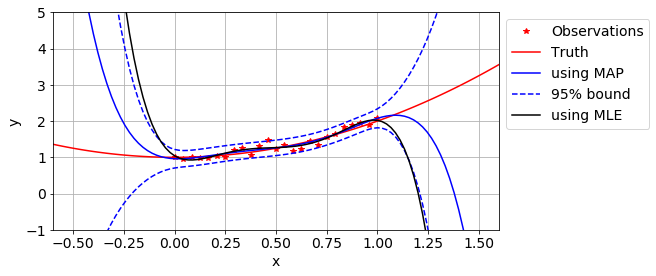

In [7]:
Xextra = 0.601 # width for extrapolation
Yrnge = [-1,5] 
Mnew = 100
Xrnge = [min(Xobs)-Xextra,max(Xobs)+Xextra]
Xnew = np.linspace(Xrnge[0],Xrnge[1],Mnew)
PhiNew = np.zeros((Mnew,N))
for i in range(0,Mnew):
    for j in range(0,N):
        PhiNew[i,j] = basisFun(Xnew[i],j)
Yvar = np.matmul(PhiNew,np.matmul(P,np.transpose(PhiNew))) + np.identity(Mnew)/RHO
Ymap = np.matmul(PhiNew,m)
Ymle = np.matmul(PhiNew,Wmle)
fig = plt.figure(N+1,figsize=(8, 4))
ax = plt.subplot(111)
plt.plot(Xobs,Yobs,'r*',label='Observations')
if trueKnown ==1:
    Ytrue = np.matmul(PhiNew,np.transpose(Wtrue))
    plt.plot(Xnew,Ytrue,'r-',label='Truth')
plt.plot(Xnew,Ymap,'b-',label='using MAP')
plt.plot(Xnew,Ymap+2*np.sqrt(np.diag(Yvar)),'b--',label='95% bound')
plt.plot(Xnew,Ymap-2*np.sqrt(np.diag(Yvar)),'b--')
plt.plot(Xnew,Ymle,'k-',label='using MLE')
plt.grid(True)
ax.legend(bbox_to_anchor=(1, 1))
plt.ylabel('y')
plt.xlabel('x')
plt.ylim(Yrnge)
plt.xlim([Xrnge[0],Xrnge[1]])
#plt.legend(loc='best', numpoints = 1)
plt.savefig('figs/2_BLR_pred.eps',bbox_inches='tight')

#### Prior variance vs log-evidence plot (1D)

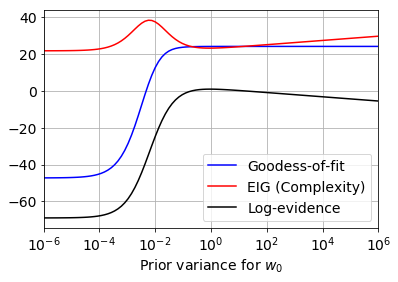

In [8]:
mpl.rcParams.update({'font.size':14})
P0try = np.asarray([row[:] for row in P0])# prior covariance of w
Niter = 100
indi = 0
Varlim=[-6,6]
P0ii = np.logspace(-6,6,Niter)
logEvidi = [0]*Niter
gofi = [0]*Niter
for i in range(0,Niter):
        P0try[indi,indi] = P0ii[i]
        P0inv = la.inv(P0try)
        PMLEinv = np.matmul(np.matmul(np.transpose(Phi),GAMinv),Phi)
        Wmle = np.matmul(np.matmul(np.matmul(la.inv(PMLEinv),np.transpose(Phi)),GAMinv),Yobs)
        Pinv = P0inv + PMLEinv
        P = la.inv(Pinv) 
        m = np.matmul(P,np.matmul(P0inv,m0) + np.matmul(PMLEinv,Wmle))
        B = np.matmul(Phi,np.matmul(P0try,np.transpose(Phi))) + la.inv(GAMinv)
        logEvidi[i] = np.log(st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m0),B))
        gofi[i] = np.log(st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m),np.identity(M)/RHO))
EIGi = [x1 - x2 for (x1, x2) in zip(gofi, logEvidi)]
fig=plt.figure(21)
plt.semilogx(P0ii,gofi,'b-',label='Goodess-of-fit')
plt.semilogx(P0ii,EIGi,'r-',label='EIG (Complexity)')
plt.semilogx(P0ii,logEvidi,'k-',label='Log-evidence')
plt.grid(True)
plt.xlim(np.power(10.0,Varlim))
plt.legend(loc='best', numpoints = 1)
plt.xlabel(r'Prior variance for $w_'+str(indi)+'$')
plt.savefig('figs/2_BLR_priorsens1D_'+str(indi)+'.eps',bbox_inches='tight')

#### Prior variance vs log-evidence plot (2D)

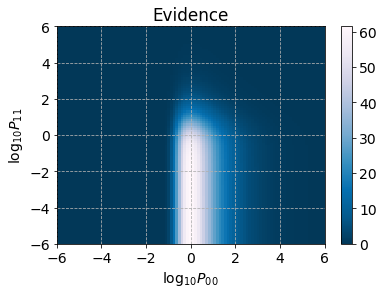

In [9]:
P0try = np.asarray([row[:] for row in P0])# prior covariance of w
Niter = 100
indi1 = 0
indi2 = 1
Varlim1=[-6,6]
Varlim2=[-6,6]
P0ii1 = np.logspace(-6,6,Niter)
P0ii2 = np.logspace(-6,6,Niter)
P01,P02 = np.meshgrid(P0ii1,P0ii2)
logEvid2d = np.zeros((Niter,Niter))
gof2d = np.zeros((Niter,Niter))
for i in range(0,Niter):
    for j in range(Niter):
        P0try[indi1,indi1] =  P01[i,j]
        P0try[indi2,indi2] =  P02[i,j]
        P0inv = la.inv(P0try)
        PMLEinv = np.matmul(np.matmul(np.transpose(Phi),GAMinv),Phi)
        Wmle = np.matmul(np.matmul(np.matmul(la.inv(PMLEinv),np.transpose(Phi)),GAMinv),Yobs)
        Pinv = P0inv + PMLEinv
        P = la.inv(Pinv) 
        m = np.matmul(P,np.matmul(P0inv,m0) + np.matmul(PMLEinv,Wmle))
        B = np.matmul(Phi,np.matmul(P0try,np.transpose(Phi))) + la.inv(GAMinv)
        logEvid2d[i,j] = np.log(st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m0),B))
        gof2d[i,j] = st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m),np.identity(M)/RHO)
fig=plt.figure(31)
plt.pcolor(np.log10(P0ii1),np.log10(P0ii2),np.exp(logEvid2d),cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel(r'$\log_{10}P_{'+str(indi1)+str(indi1)+'}$')
plt.ylabel(r'$\log_{10}P_{'+str(indi2)+str(indi2)+'}$')
plt.title('Evidence')
plt.savefig('figs/2_BLR_priorsens2D_'+str(indi1)+str(indi2)+'.eps',bbox_inches='tight')